# Assignment 1. Predictive modelling

**Scenario:** Samatha is a Lego enthusiast and wants to be able to predict the price of a new Lego product before it is revealed so she can budget it from her revenue.

Linear Regression Method: 
1. Check for missing data and clean it.
2. Plot distribution graphs (histogram/bar graph) of column data; you may choose to leverage pair plots.
3. Find correlations between data variables
4. Plot simple linear regression and adjust the R square
5. Create train and test data to explore the relation.
6. Predict the new prices based on the linreg.coef_, linreg.intercept_ values.

# Step 1. Import libraries & data
To perform the analysis, the following must be imported:

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting

import os # accessing directory structure

#import python libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import sem, norm, wilcoxon
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


#Get multiple outputs in the same cell: 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#filter out warnings 
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore', category=DeprecationWarning)


#set seaborn parameters & style
sns.set_context("poster")
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style("whitegrid")

In [2]:
#import the dataset
df = pd.read_csv('lego.csv')
df.head()
df.shape

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
0,19,29.99,2,277,4.0,0,4.5,0,4.0,20
1,19,19.99,2,168,4.0,2,5.0,0,4.0,20
2,19,12.99,11,74,4.3,2,4.3,0,4.1,20
3,5,99.99,23,1032,3.6,0,4.6,1,4.3,20
4,5,79.99,14,744,3.2,1,4.6,1,4.1,20


(12261, 10)

## Step 2. Clean the data
- Check data types
- Check for missing values and duplicates

In [3]:
#Ensure data types are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  int64  
 1   list_price         12261 non-null  float64
 2   num_reviews        12261 non-null  int64  
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   12261 non-null  float64
 5   review_difficulty  12261 non-null  int64  
 6   star_rating        12261 non-null  float64
 7   theme_name         12261 non-null  int64  
 8   val_star_rating    12261 non-null  float64
 9   country            12261 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 958.0 KB


In [4]:
#check for nulls
df.isna().sum()

ages                 0
list_price           0
num_reviews          0
piece_count          0
play_star_rating     0
review_difficulty    0
star_rating          0
theme_name           0
val_star_rating      0
country              0
dtype: int64

There are no null values

In [5]:
#check for duplicated rows
df.duplicated().sum()

1496

In [6]:
#remove these duplicated rows
df.drop_duplicates(keep=False, inplace=True)
df

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
0,19,29.9900,2,277,4.0,0,4.5,0,4.0,20
1,19,19.9900,2,168,4.0,2,5.0,0,4.0,20
2,19,12.9900,11,74,4.3,2,4.3,0,4.1,20
3,5,99.9900,23,1032,3.6,0,4.6,1,4.3,20
4,5,79.9900,14,744,3.2,1,4.6,1,4.1,20
...,...,...,...,...,...,...,...,...,...,...
12234,23,42.6878,18,254,4.2,2,4.2,37,4.4,19
12236,23,30.4878,8,204,4.1,0,4.4,37,4.1,19
12237,23,30.4878,19,201,4.1,2,4.6,37,4.4,19
12238,19,18.2878,7,141,4.0,2,4.1,37,4.4,19


In [7]:
#reset index
df = df.reset_index(drop=True)
df

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
0,19,29.9900,2,277,4.0,0,4.5,0,4.0,20
1,19,19.9900,2,168,4.0,2,5.0,0,4.0,20
2,19,12.9900,11,74,4.3,2,4.3,0,4.1,20
3,5,99.9900,23,1032,3.6,0,4.6,1,4.3,20
4,5,79.9900,14,744,3.2,1,4.6,1,4.1,20
...,...,...,...,...,...,...,...,...,...,...
9339,23,42.6878,18,254,4.2,2,4.2,37,4.4,19
9340,23,30.4878,8,204,4.1,0,4.4,37,4.1,19
9341,23,30.4878,19,201,4.1,2,4.6,37,4.4,19
9342,19,18.2878,7,141,4.0,2,4.1,37,4.4,19


In [8]:
#add a column 'price per piece'
df['price/piece'] = df['list_price']/df['piece_count']
df.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,price/piece
0,19,29.99,2,277,4.0,0,4.5,0,4.0,20,0.108267
1,19,19.99,2,168,4.0,2,5.0,0,4.0,20,0.118988
2,19,12.99,11,74,4.3,2,4.3,0,4.1,20,0.175541
3,5,99.99,23,1032,3.6,0,4.6,1,4.3,20,0.096890
4,5,79.99,14,744,3.2,1,4.6,1,4.1,20,0.107513


In [9]:
#check spread of data in columns
pd.set_option('max_colwidth', 11) #to fit all columns in view
df.describe()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,price/piece
count,9344.00...,9344.00...,9344.00...,9344.00...,9344.00...,9344.00...,9344.00...,9344.00...,9344.00...,9344.00...,9344.00...
mean,17.475171,70.839750,16.965111,524.776327,3.863303,1.825557,4.003564,19.963827,3.686655,10.022581,1.762075
std,7.460870,98.464575,38.401874,842.380011,1.518308,1.700390,1.500659,11.506839,1.508387,6.187414,13.664709
min,0.000000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000
25%,11.000000,23.392200,2.000000,101.000000,3.900000,0.000000,4.000000,9.000000,3.500000,4.000000,0.111612
50%,19.000000,37.752450,5.000000,247.000000,4.400000,2.000000,4.600000,17.000000,4.200000,10.000000,0.141353
75%,23.000000,77.880000,13.000000,585.000000,4.800000,2.000000,4.800000,33.000000,4.600000,15.000000,0.215072
max,30.000000,1104.87...,367.000000,7541.00...,5.000000,5.000000,5.000000,40.000000,5.000000,20.000000,304.497100


## Step 3. Explore the Data
Visualize data with matplotlib and seaborn libraries to gain an understanding of the data and identify outliers, patterns and how different variables interact with price.

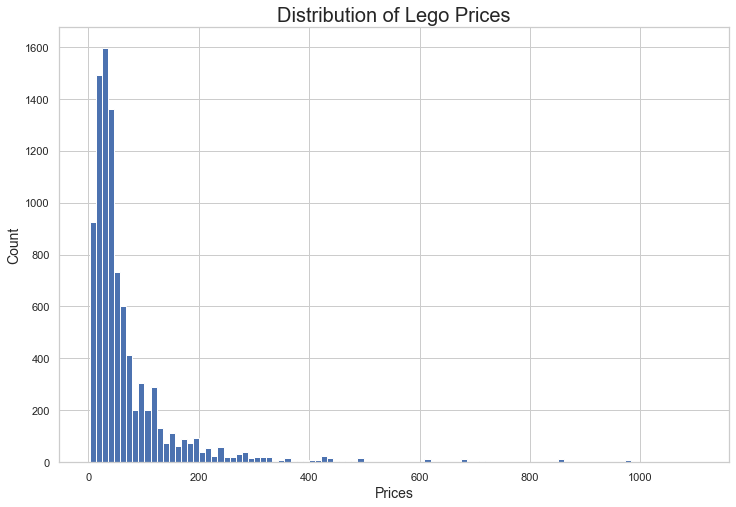

In [10]:
#plot a histogram using matplotlib

plt.figure(figsize=(12,8))
plt.title('Distribution of Lego Prices', fontsize = '20')
plt.xlabel('Prices', fontsize = '14')
plt.ylabel('Count', fontsize = '14')
plt.hist(x = 'list_price', data = df, bins = 100); #100 bins in order to show more

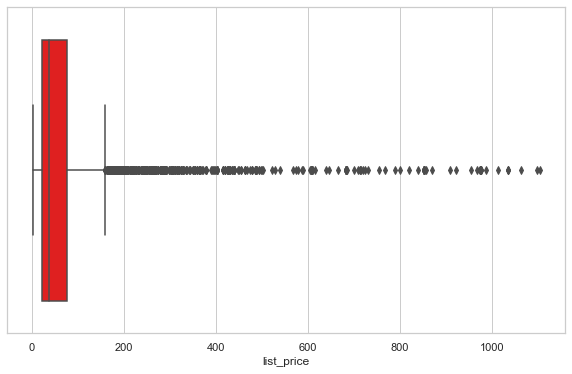

In [11]:
#plot a boxplot of prices
sns.boxplot(x=df["list_price"], color='red');

It appears that there are many outliers, as prices can vary with lego sets. Number of pieces is a hypothesized explanatory variable for price, so this can be visualized with a seaborn scatterplot, adding a third variable, review difficulty, to explore whether:
- lego sets with more pieces are more difficult
- lego sets that are more difficult are more expensive

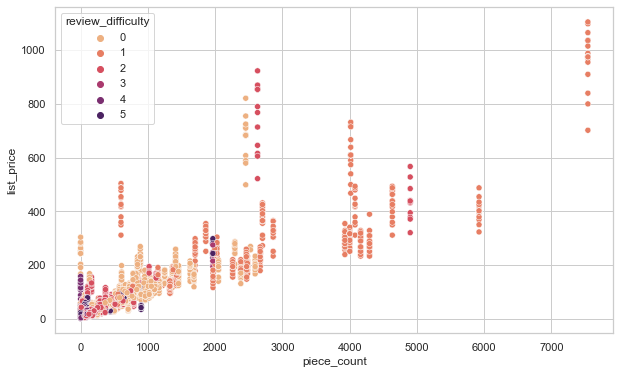

In [12]:
#difficulty vs price vs piece count
sns.scatterplot(data=df, x="piece_count", y="list_price", hue="review_difficulty", palette='flare');

From the above scatterplot, it looks like more difficult lego sets have less pieces - maximum 2000 pieces - whereas lego sets with more pieces are rated 1/5 in difficulty but are more expensive. 

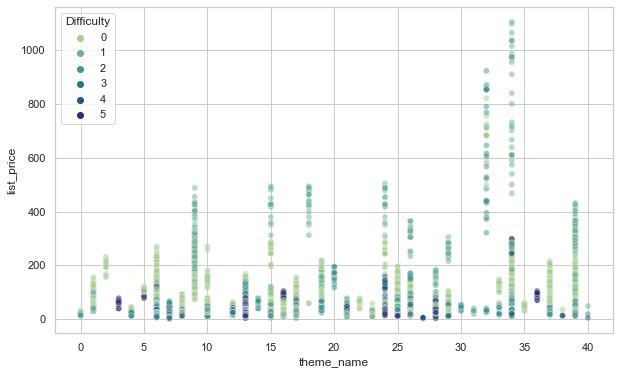

In [13]:
# Which themes are the most expensive + difficult?
g = sns.scatterplot(data=df, x="theme_name", 
                    y="list_price", hue='review_difficulty', 
                    palette='crest', alpha=0.5)
sns.move_legend(g, "upper left", title='Difficulty')
plt.show()

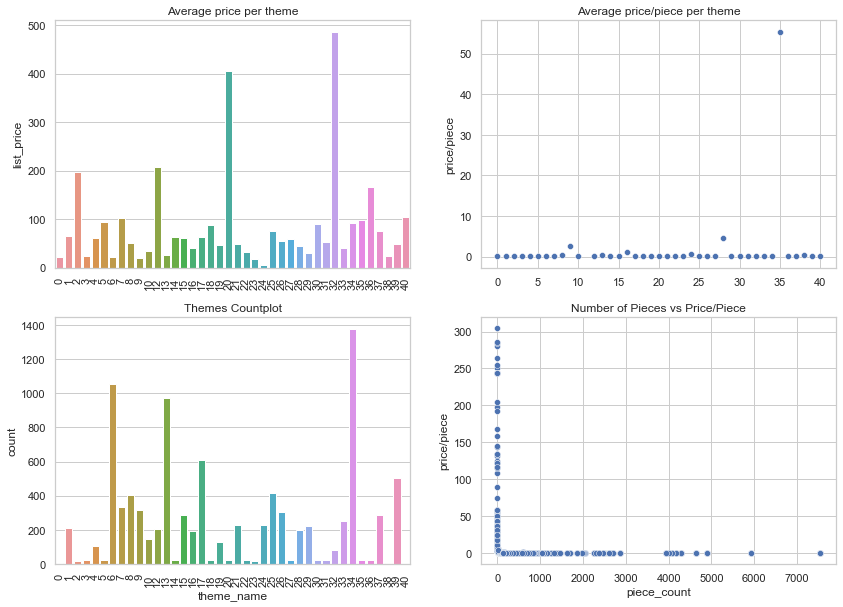

In [14]:
#explore themes vs price
fig, axes = plt.subplots(2,2, figsize=(14,10))

#set axis variables to plot mean price
x1 = df.theme_name.unique()
y1 = df.groupby('theme_name')['list_price'].mean()

#plot average price per theme
b = sns.barplot(ax=axes[0,0], x = x1, y=y1)
b.tick_params(axis='x', rotation=90)
b.set_title('Average price per theme')

#create themes countplot
c = sns.countplot(ax=axes[1,0], data=df, x='theme_name')
c.tick_params(axis='x', rotation =90)
c.set_title('Themes Countplot')

#set axis variables to plot average price per piece 
x2 = df.theme_name.unique()
y2 = df.groupby('theme_name')['price/piece'].mean()

#create scatterplot for average price/piece per theme
s = sns.scatterplot(ax=axes[0,1], x=x2, y=y2)
s.set_title('Average price/piece per theme')

#number of pieces vs piece/price
sns.scatterplot(data=df, x='piece_count', y='price/piece')
plt.title('Number of Pieces vs Price/Piece');

- Theme 32 has the highest average price per theme. 
- Theme 35 has the highest price per piece
- Theme 34 is the most common theme in the dataset.
- Lego sets with less pieces can be more expensive per piece (up to over $300 per piece), while lego sets with a large amount of pieces have better price/piece value.

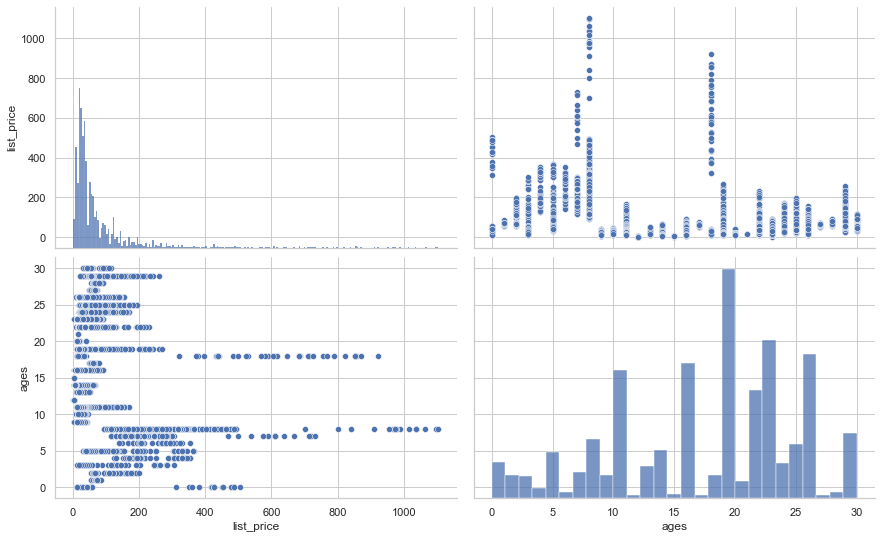

In [15]:
#create dataset containing only price and ages
pa = df[['list_price', 'ages']]

#create pairplot for price and ages
sns.pairplot(pa, kind='scatter')
plt.gcf().set_size_inches(14, 8)
plt.show();

From the above pairplots it can be deduced that:
- The most common age for Lego products is 19.
- The most expensive lego products cater to 8 year olds and 19 year olds
- There is no evident linear relationship between age and price

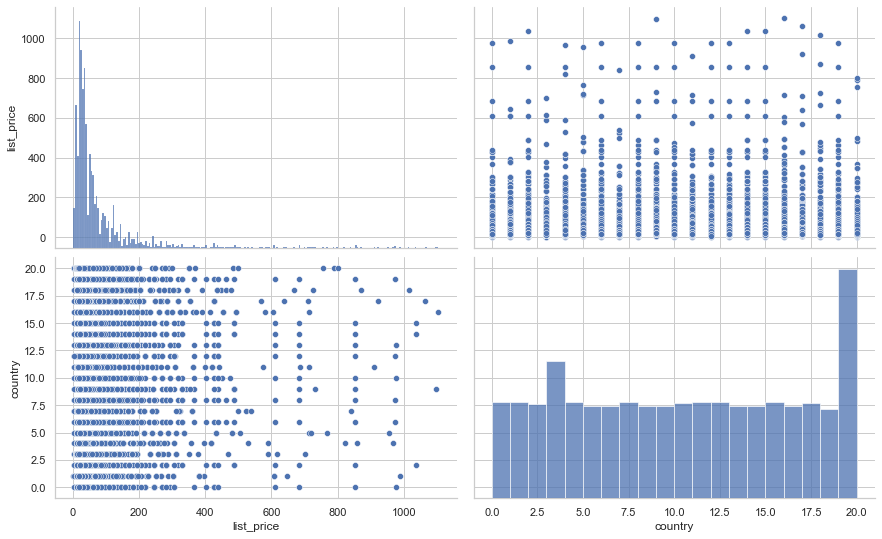

In [16]:
#number of countries the products are sold in vs price
pc = df[['list_price', 'country']]
sns.pairplot(pc, kind='scatter')
plt.gcf().set_size_inches(14, 8)
plt.show();

- There is no relationship between number of countries sold and price
- The majority of lego products are sold in 20 countries

The different ratings and price can also be explored using a pairplot:

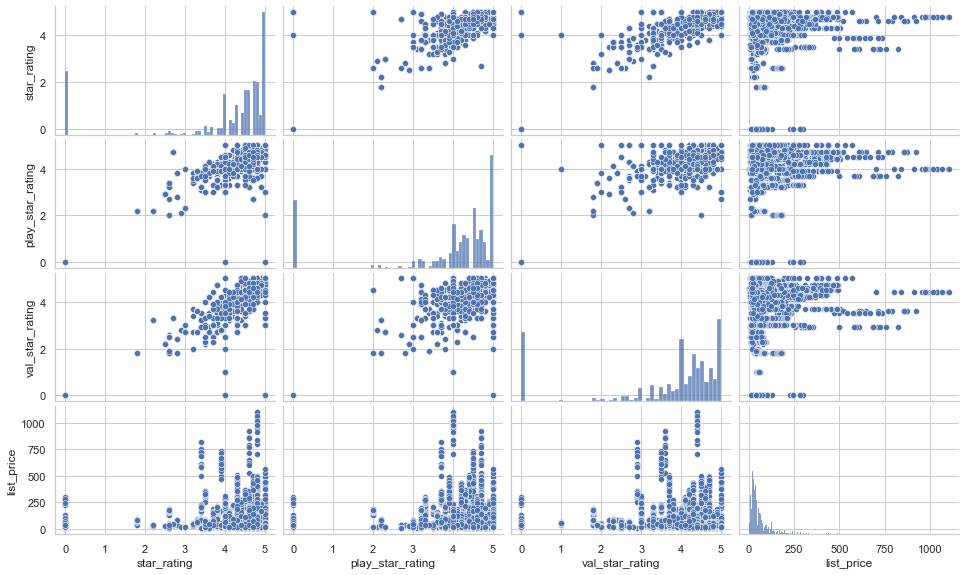

In [17]:
#create dataset containing only ratings and price
pr = df[['star_rating', 'play_star_rating', 'val_star_rating', 'list_price']]

#create pairplot for ratings
sns.pairplot(pr, kind='scatter')
plt.gcf().set_size_inches(14, 8)
plt.show();

From the pairplots above, it can be deduced that:
- more expensive lego sets are more likely to have higher star ratings
- the highest play star rating for sets over 1000 dollars is around 4.
- expensive sets have high val star rating , but the highest rated sets for all types of ratings are maximum 550-600 dollars.

In [18]:
#Find the Entropy or disorder of prices
price_unique = df['list_price'].value_counts()

entropy_price = stats.entropy(price_unique)
print(f"The entropy for list price of legos is {entropy_price}")

The entropy for list price of legos is 5.40573795501421


## Step 4. Finding Correlations
Which variable has the highest correlation with list price?

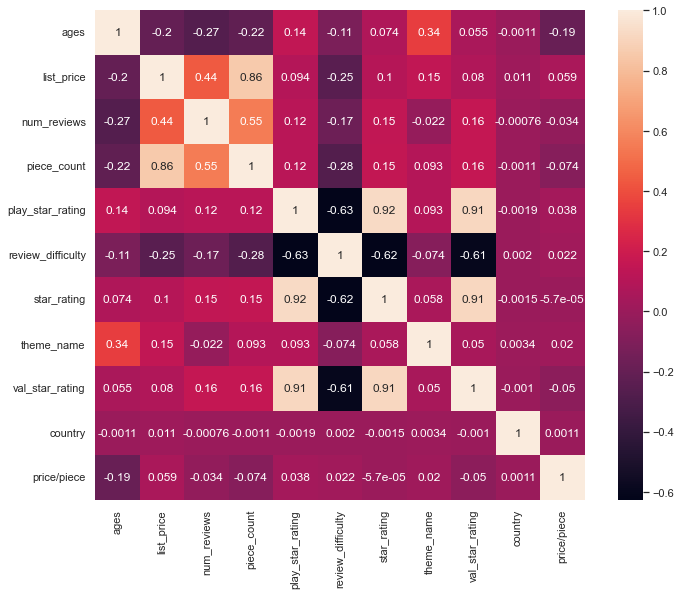

In [19]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, annot=True);

Piece count has the highest correlation with price, so the price is most influenced by how many pieces there are in the lego set.

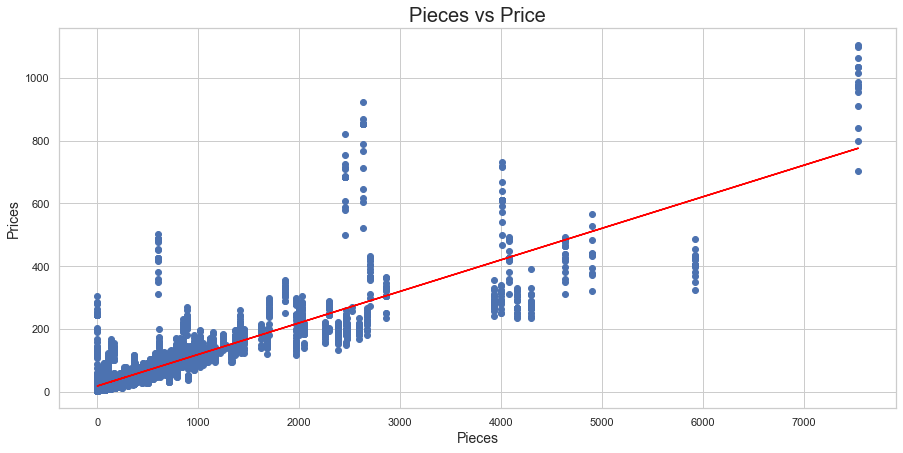

In [20]:
#draw a scatterplot for list_price and piece_count

def draw_scatter_plot(X, Y):
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()
    ax.scatter(X, Y, c='b')
    plt.title('Pieces vs Price', fontsize = 20)
    plt.xlabel('Pieces', fontsize = 14)
    plt.ylabel('Prices', fontsize = 14)
    
x = df['piece_count']
y = df['list_price']

draw_scatter_plot(x, y)

#calculate equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x), color = 'red');

From the scatterplot, there is a positive linear relationship, with price increasing with number of pieces.

# Step 5. Hypothesis Testing for Linear Regression
Hypothesis testing will help to determine whether there is enough evidence to conlude that there is a significant relationship between piece count and price.

Using the linear regression formula:
    **Y = β0 + β1 * X + ϵ**

where:
- Y = price
- X = number of pieces
- β0 = the constant or intercept where X = 0
- β1 = the coefficient or slope of the regression line
- ϵ = errors/residuals
    
The null hypothesis (Ho) is that there is no significant relationship between piece count and price - so the coefficient (**β1**) of the linear regression model would equal 0

The alternate hypothesis (Ha) is that there is a relationship between piece count and price - the coefficient (**β1**) of the regression line would not equal to zero.

In [21]:
#set X and Y variables
X = df['piece_count'].values.reshape(-1,1)
Y = df['list_price']

#create linear regression model
linreg = LinearRegression()
linreg.fit(X, Y)

#find coefficient and intercept
print('Coefficient:', linreg.coef_)
print('Intercept:', linreg.intercept_)

LinearRegression()

Coefficient: [0.10050306]
Intercept: 18.098125352128825


The equation for the line would be:

**Price** = 0.10050306 * **Piece Count** + 18.098125352128825

### The coefficient is not equal to 0, so the null hypothesis is rejected.

Since a lego set cannot be sold for $18.10 with 0 pieces, the intercept is not applicable to this scenario. The coefficient means that for every piece, the price increases by 10 cents.

In [22]:
#find R score
linreg.score(X, Y)

0.7392896337765152

The R score or R squared indicates that the linear regression line explains about 73.93% of the data's variation.

The adjusted R score adjusts for the number of predictors in a model and is calculated with the following equation:

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

- R2: The R2 of the model
- n: The number of observations
- k: The number of predictor variables

(source: https://www.statology.org/adjusted-r-squared-in-python/)

In [23]:
#adjusted R score
1 - (1-linreg.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)

0.7392617264369494

There is not much of a difference between the automatic R score and adjusted R score, with the adjusted R score slightly lower. The adjusted R score is a more accurate way of validating how well the regression fits the data, and the score here suggests a good fit. 

## Chi Square Test 
Use the chi square test to obtain the p-value and test whether there is a correlation between list_price and piece_count.

- Ho = there is no correlation between price and piece count
- Ha = there is a correlation between price and piece count

With a significance level of 0.05, if the p-value is less than 0.05, the null hypothesis is rejected.

In [24]:
#Create contingency table to compute chi square statistic
ct=pd.crosstab(df['list_price'], df['piece_count'], margins=True)
ct

piece_count,1,2,7,8,10,12,13,15,16,18,...,4002,4016,4080,4163,4295,4634,4900,5923,7541,All
list_price,,,,,,,,,,,,,,,,,,,,,
2.2724,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2.3322,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2.4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2.49,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2.786,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035.78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3
1064.9929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1097.939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [25]:
#find p-value using chi square
obs = np.array(ct)

stats.chi2_contingency(obs)[0:3]

(421837.52021353814, 0.0, 300124)

The p-value here is 0.0, which is significantly lower than 0.05, so the null hypothesis is rejected, meaning there is a correlation between list_price and piece_count.

# Step 6. Building a Linear Regression Model

To build a linear regression model, the dataset will be split 80/20:
- 80% will be used in training 
- 20% will be used in testing 

In order to ensure that the same results are returned each time, a random_state parameter will be set.

In [26]:
#create training and test subsets - split data 80/20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

**Check the shape & sample of the train data:**

In [27]:
# About training
print('X_train is a %s' % type(X_train))
print('X_train has', X_train.shape[0], 'rows')
print('')
print('Sample of X_train%s' % ('_'*50))
print(X_train[:10])

print('')
print('Y_train is a %s' % type(Y_train))
print('Y_train has', Y_train.shape[0], 'rows')
print('')
print('Sample of Y_train%s' % ('_'*50))
print(Y_train[:10])

X_train is a <class 'numpy.ndarray'>
X_train has 7475 rows

Sample of X_train__________________________________________________
[[2382]
 [ 825]
 [4634]
 [ 214]
 [1376]
 [3929]
 [ 149]
 [  53]
 [ 400]
 [ 378]]

Y_train is a <class 'pandas.core.series.Series'>
Y_train has 7475 rows

Sample of Y_train__________________________________________________
5630    181.9860
3731    152.4878
4888    487.9390
1104     24.3878
5435    182.9878
6780    292.7878
8884     40.5971
4736      7.2590
1328     60.9878
665      34.1924
Name: list_price, dtype: float64


**Check the shape & sample of the test data:**

In [28]:
# About test
print('X_test is a %s' % type(X_test))
print('X_test has', X_test.shape[0], 'rows')
print('')
print('Sample of X_test%s' % ('_'*50))
print(X_test[:10])

print('')
print('Y_test is a %s' % type(Y_test))
print('Y_test has', Y_test.shape[0], 'rows')
print('')
print('Sample of Y_test%s' % ('_'*50))
print(Y_test[:10])

X_test is a <class 'numpy.ndarray'>
X_test has 1869 rows

Sample of X_test__________________________________________________
[[  68]
 [ 192]
 [2863]
 [ 303]
 [ 210]
 [ 603]
 [ 140]
 [   1]
 [ 183]
 [ 863]]

Y_test is a <class 'pandas.core.series.Series'>
Y_test has 1869 rows

Sample of Y_test__________________________________________________
941      12.1524
45       19.9900
2311    233.9922
6845     60.9878
7023     24.3878
5933     76.9860
2562     12.1380
7079     42.6878
7541     22.0870
1840    134.1878
Name: list_price, dtype: float64


# Step 6. Training the Model
Use linear regression to fit the model to the data

In [29]:
model = LinearRegression()

#fit the linear regression using training data
model.fit(X_train, Y_train)


print('Coefficient:', model.coef_) 
print('Constant:', model.intercept_)

LinearRegression()

Coefficient: [0.10188612]
Constant: 17.853242784002326


The formula of the line is:

**Predicted Price = 0.10188612 * Number of Pieces + 17.853242784002326**

The slope is still around 10 cents per piece, but the difference here is the intercept has decreased from 18.09 to 17.85.

# Step 7. Test the Model

In [30]:
#apply model to make predictions on test data
Y_pred = model.predict(X_test)

## Regression Plot
Plot prediction model (Y_pred) against test data (Y_test) for price

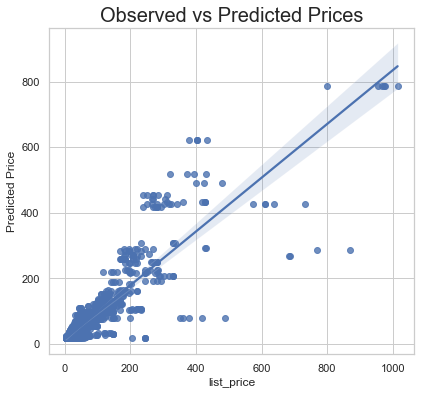

In [31]:
#create regression plot of test data
plt.title('Observed vs Predicted Prices', fontsize='20')
plt.ylabel('Predicted Price')
sns.regplot(x=Y_test, y=Y_pred, ci = 95); 
plt.axis('scaled') #for 1:1 ratio of grid
plt.show();

There is not quite a 1 to 1 relationship between the observed vs predicted, however it seems that the model is better at predicting prices that are less than $200.

To test the model with a real example, a lego set will be randomly selected from the data by piece count:

In [32]:
df.piece_count.sample(random_state=2022)

6733    836
Name: piece_count, dtype: int64

In [33]:
#insert piece count into prediction model 
x = [[836]]
Ypred = model.predict(x)
print('Predicted price for lego set: ', Ypred[0])

Predicted price for lego set:  103.03004107313984


**Compare predicted price with actual price for lego set with 836 pieces:**

In [34]:
#select row from df using index
df.iloc[[6733]]

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,price/piece
6733,26,109.7878,3,836,5.0,0,4.7,34,3.7,13,0.131325


- Predicted price was 103.03
- Actual price was 109.79

The prediction is only 6.76 dollars lower than the actual price.

In [35]:
#actual vs predicted sample dataframe
df_preds = pd.DataFrame({'Observed': Y_test.squeeze(), 'Predicted': Y_pred.squeeze()})
df_preds['Residual'] = df_preds['Observed']-df_preds['Predicted']
df_preds.sample(n=10)

,Observed,Predicted,Residual
1392,42.6878,55.143564,-12.455764
1282,36.5878,49.336055,-12.748255
8633,121.7971,136.754348,-14.957248
7640,142.8700,124.528013,18.341987
6529,146.3878,31.505983,114.881817
7246,12.9870,32.117300,-19.130300
837,60.7924,77.864169,-17.071769
4986,48.7390,55.143564,-6.404564
7211,42.6878,51.475663,-8.787863
274,69.9900,79.290575,-9.300575


From the dataframe sample comparing observed and predicted prices, the negative residuals are due to the prediction being too high, and the positive residuals are due to the prediction being lower than the observed.

# Step 8. Evaluate Model
- Find R squared
- Find errors 
- Check the 5 key assumptions of linear regression for residuals

## Find R squared

In [36]:
#find adjusted R scores of test and training data
print('R score of test data:', 1 - (1-linreg.score(X_test, Y_test))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('R score of training data:', 1 - (1-linreg.score(X_train, Y_train))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))

R score of test data: 0.7690601216721711
R score of training data: 0.7318308375186391


This means that 76.9% of the test data's variance is explained by the regression model. The R score is slightly lower for the training data, which means that the data split may have to be changed to a different ratio, such as 70/30, or even 50/50.

## Find Error

In [37]:
MAE = mean_absolute_error(Y_test, Y_pred)
MSE = mean_squared_error(Y_test, Y_pred)
RMSE = np.sqrt(MSE)
SE_pred = sem(Y_pred)
SE_price = sem(Y)

print(f'Mean absolute error: {MAE:.2f}')
print(f'Mean squared error: {MSE:.2f}')
print(f'Root mean squared error: {RMSE:.2f}')
print(f'Standard Error of Mean for predicted: {SE_pred:.2f}')
print(f'Standard Error of Mean for list_price: {SE_price:.2f}')

Mean absolute error: 23.04
Mean squared error: 2238.56
Root mean squared error: 47.31
Standard Error of Mean for predicted: 2.12
Standard Error of Mean for list_price: 1.02


- The mean absolute error here is 23.04, which means that for every prediction of the model, the overall average error will be a $23.04 difference from the actual value.

- The mean squared error is the average squared difference between the observed and the prediction. Squaring eliminates negative  values and increases the impact of larger errors. 

- The root mean squared error is the standard deviation of the residuals, and it shows how much the data can vary, so there may be a difference of $47.31 between the predicted and actual value.

- The standard error of the mean is how spread out the values are around the mean. The larger the sample, the smaller the error, as shown by comparing list_price SEM (larger sample) with predicted price SEM.

## Confidence Interval of Predicted Price

In [38]:
#get z critical value for 95% confidence interval
z_critical = stats.norm.ppf(q = 0.95)
pop_stdev = Y_pred.std()  # Get the population standard deviation
pop_stdev

91.60970726751644

In [39]:
sample_mean = Y_pred.mean()
sample_mean

73.8345699865066

In [40]:
margin_of_error = z_critical * (pop_stdev/math.sqrt(len(Y_pred)))  #Calculate margin of error.
margin_of_error

3.485492090053631

In [41]:
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  
confidence_interval

(70.34907789645297, 77.32006207656022)

This confidence interval suggests that there is a 95% chance that the predicted price is between 70.34 and 77.32 dollars.

## The 5 Assumptions of Linear regression 
1.	Linear Relationship
2.	Normal Distribution of Residuals
3.	Multicollinearity
4.	Autocorrelation
5.	Homoscedasticity

(source: https://dataaspirant.com/assumptions-of-linear-regression-algorithm/#t-1609311604908)

There's only 1 independent variable here so multicollinearity does not need to be checked. Autocorrelation is when residuals are not independent of each other, which in this case is also irrelevant.

### Normal Distribution of Residuals

The normal distribution of residuals can be checked using a seaborn distribution plot:

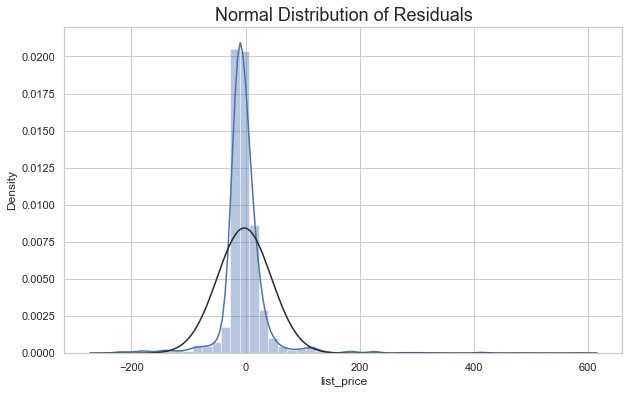

In [42]:
#create residuals variable
residuals = Y_test - Y_pred

#create distribution plot of residuals
plt.title('Normal Distribution of Residuals', fontsize=18)
sns.distplot(residuals, fit=norm);

Normal distribution of residuals has a positive skew.

In [43]:
#find the mean + standard deviation of residuals
residuals.mean()
residuals.std()

-2.4043318377639418

47.26492104328479

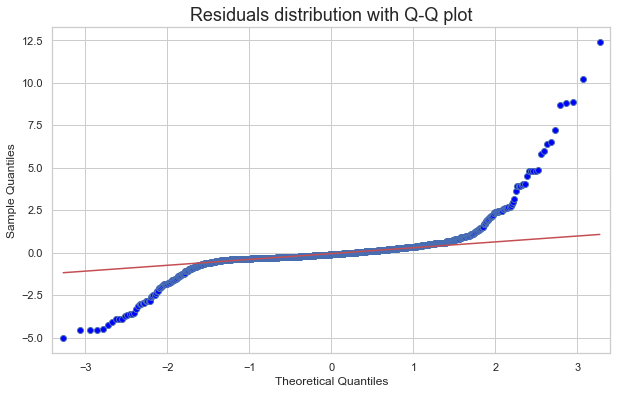

In [44]:
#qq plot of residuals with standard deviations as y-axis
fig = sm.qqplot(residuals, line='q', fit=True)
plt.title('Residuals distribution with Q-Q plot', fontsize=18);

The residuals qqplot shows that the data is from an overdispersed distribution with lots of outliers (source: https://www.ucd.ie/ecomodel/Resources/QQplots_WebVersion.html) 

### Homoscedasticity 
Homoscedasticity is when the variance of the residuals is constant for all X values.
Constant variance can be determined with a fitted vs residuals plot.
If the variance is constant, there will be little to no trend between fitted and residual values.

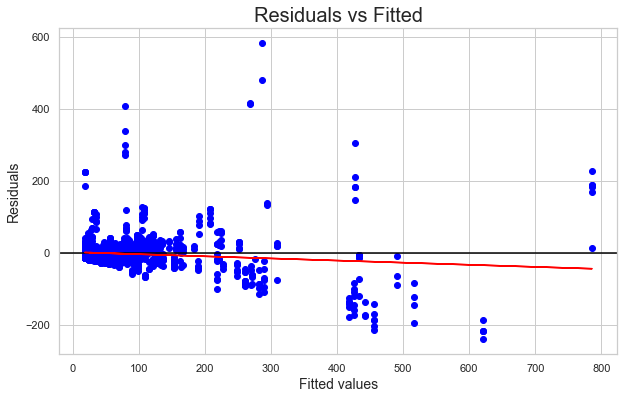

In [45]:
#create residuals vs fitted plot
plt.title('Residuals vs Fitted', fontsize=20)
plt.xlabel('Fitted values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.scatter(Y_pred, residuals, color='blue')
plt.axhline(y=0, color='black', alpha=1)

#calculate equation for trendline
z = np.polyfit(Y_pred, residuals, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(Y_pred, p(Y_pred), color = 'red');

According to this Residuals vs Fitted plot, the variance of the residuals seems to increase as predicted values increase.
There appears to be a slight negative trend, with higher predicted prices more likely to be an overestimate (higher than the observed) and lower predicted prices being an underestimated value.

## Residual Plot

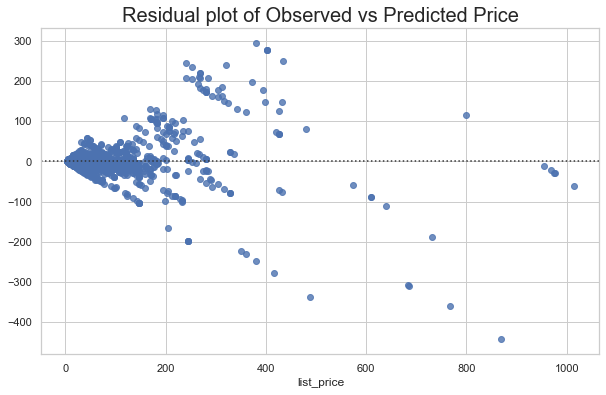

In [46]:
#create residual plot
plt.title('Residual plot of Observed vs Predicted Price', fontsize=20)
sns.residplot(Y_test, Y_pred);


## Wilcoxon Signed Rank Test
To see if predicted price and observed price have similar distributions.

- Ho - the distribution of predicted and observed prices are similar
- Ha - the distribution of predicted and observed prices are not similar

In [47]:
#define predicted price according to piece_count
pred_price = model.predict(X)

stat, p = wilcoxon(pred_price, Y)

print(f"p_value: {p}")

p_value: 8.121138673826199e-115


The p-value is significantly less than 0.05, which means the null hypothesis is rejected.

## Compare Entropies

In [48]:
print(f"The entropy for list price of legos is {entropy_price}")

#Find the Entropy of predicted price
df['pred_price']=pd.Series(pred_price)
pred_unique = df['pred_price'].value_counts()

entropy_pred = stats.entropy(pred_unique)
print(f"The entropy for predicted price of legos is {entropy_pred}")

The entropy for list price of legos is 5.40573795501421
The entropy for predicted price of legos is 5.742157168520159


# Step 9. Plot regression lines 

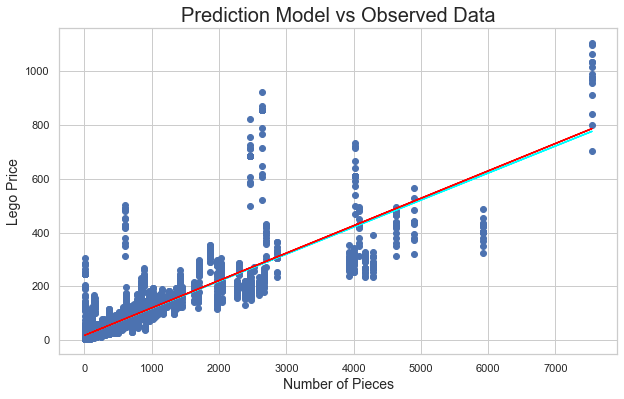

In [49]:
#plot linear regression line with observed data
plt.title('Prediction Model vs Observed Data', fontsize=20)
plt.xlabel('Number of Pieces', fontsize = 14)
plt.ylabel('Lego Price', fontsize=14)

x = df['piece_count']
y = df['list_price']

#plot original data
plt.scatter(x, y)

#calculate equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x), color = 'cyan')

#regression line
plt.plot(df.piece_count, model.predict(X), color = 'red');

The regression line shows the predicted price for x number of pieces, and in general, it is a good fit, with exceptions to variations due to other confounding variables that would influence price that cannot be measured numerically.

# Step 10. Predict a new Lego Product

In [50]:
#predict a new lego product with 8000 pieces using model
new_X = [[8000]]
new_lego = model.predict(new_X)
print(new_lego)

[832.94222163]


It is predicted that a set with 8000 pieces will cost $832.94


In [51]:
#predict a new lego product with 3500 pieces using model
new_X = [[3500]]
new_lego = model.predict(new_X)
print(new_lego)

[374.45467103]


It is predicted that a set with 3500 pieces will cost $374.45

# References
- Martinson, A 2022, How to Simplify Hypothesis Testing for Linear Regression in Python, viewed 18 August, 2022, <https://towardsdatascience.com/how-to-simplify-hypothesis-testing-for-linear-regression-in-python-8b43f6917c86>.

- Awasthi, S 2020, Five Key Assumptions of Linear Regression Algorithm, viewed 20 August, 2022, <https://dataaspirant.com/assumptions-of-linear-regression-algorithm/#t-1609311604908>.

- Yearsley, J 2022, Quantile-Quantile Plots, viewed 22 August, 2022, <https://www.ucd.ie/ecomodel/Resources/QQplots_WebVersion.html>.

- Zach 2022, How to Calculate Adjusted R-Squared in Python - Statology, viewed 22 August, 2022, <https://www.statology.org/adjusted-r-squared-in-python/>.
